In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
df=pd.read_csv('/content/vehicle_emissions.csv')

In [22]:
print(df.head)

<bound method NDFrame.head of     engine_size fuel_type  co2_emissions emission_category
0      1.887889    petrol     215.413794                 B
1      1.924299  electric     234.463942                 C
2      3.687571    diesel     180.042027                 A
3      1.078842    petrol     156.704264                 A
4      1.416434    diesel     269.166344                 A
..          ...       ...            ...               ...
95     1.124733  electric      65.379257                 C
96     2.049056  electric     270.726567                 B
97     3.380312  electric     179.019755                 B
98     1.205703    petrol     276.628430                 B
99     2.985465    petrol     192.829735                 B

[100 rows x 4 columns]>


In [23]:
print(df.shape)

(100, 4)


In [24]:
print(df.describe)

<bound method NDFrame.describe of     engine_size fuel_type  co2_emissions emission_category
0      1.887889    petrol     215.413794                 B
1      1.924299  electric     234.463942                 C
2      3.687571    diesel     180.042027                 A
3      1.078842    petrol     156.704264                 A
4      1.416434    diesel     269.166344                 A
..          ...       ...            ...               ...
95     1.124733  electric      65.379257                 C
96     2.049056  electric     270.726567                 B
97     3.380312  electric     179.019755                 B
98     1.205703    petrol     276.628430                 B
99     2.985465    petrol     192.829735                 B

[100 rows x 4 columns]>


In [25]:
print(df.dtypes)

engine_size          float64
fuel_type             object
co2_emissions        float64
emission_category     object
dtype: object


In [26]:
print(df.isnull().sum())

engine_size          0
fuel_type            0
co2_emissions        0
emission_category    0
dtype: int64


In [27]:
le_fuel = LabelEncoder()
le_category = LabelEncoder()
df["fuel_type"] = le_fuel.fit_transform(df["fuel_type"])
df["emission_category"] = le_category.fit_transform(df["emission_category"])

In [28]:
X = df.drop("emission_category", axis=1)
y = df["emission_category"]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, y_pred)
class_labels = le_category.classes_

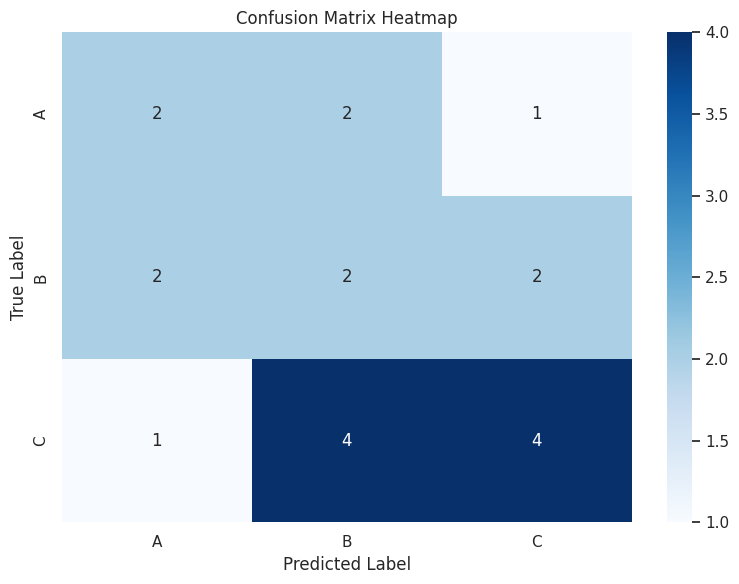

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

In [34]:
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           A       0.40      0.40      0.40         5
           B       0.25      0.33      0.29         6
           C       0.57      0.44      0.50         9

    accuracy                           0.40        20
   macro avg       0.41      0.39      0.40        20
weighted avg       0.43      0.40      0.41        20

